<BarContainer object of 32 artists>

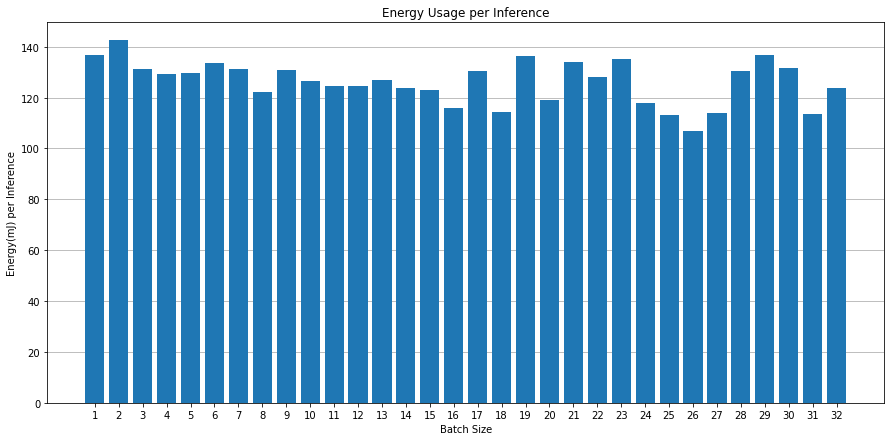

In [1]:
import matplotlib.pyplot as plt

frequency = "921600000"

# Batch Size,Concurrency,Inferences/Second,Client Send,Network+Server Send/Recv,Server Queue,Server Compute Input,Server Compute Infer,Server Compute Output,Client Recv,p50 latency,p90 latency,p95 latency,p99 latency
data = []
power_data = []
timings = []

with open(f"data/{frequency}_data.csv", "r") as f:
  data = [l.strip().split(",") for l in f.readlines()[1:]]

with open(f"data/{frequency}_power.csv", "r") as f:
  power_data = [l.strip().split(",") for l in f.readlines()]

with open(f"data/{frequency}_timings.csv", "r") as f:
  timings = [l.strip().split(",") for l in f.readlines()[1:]]


x = []
y = []

for start, stop, batch_size in timings:
  power = [p for p in power_data if p[0] > start and p[0] < stop]
  d = [d for d in data if d[0] == batch_size][0]
  avg_power = sum([float(r[1]) for r in power])/len(power)
  joule_per_inference = avg_power / float(d[2])

  x.append(batch_size)
  y.append(joule_per_inference*1000)

fig, ax = plt.subplots(figsize=(15, 7))
ax.set_axisbelow(True)
ax.grid(axis='y')
ax.set_title("Energy Usage per Inference")
ax.set_xlabel("Batch Size")
ax.set_ylabel("Energy(mJ) per Inference")

plt.bar(x, y)
